# Period Detective Exercise

## Overview
* Once you download and extract the .zip file ```light_curves.zip```, you will find a file inside it called ```key.csv``` which importantly contains a column of stellar identifiers for the 323 stars that have data in the ```light_curves/light_curves``` directory you will be working with in this exercise. 
* Your goal is to iterate through each of the object's ```_r.csv``` files (e.g. the file for the star ```2MASS_J20470481+4349114``` would be ```2MASS_J20470481+4349114_r.csv```), run the Lomb-Scargle periodogram on that light curve, return a list of stars whose lightcurves are periodic (for now we will assume stars whose peak power is more than 0.5 to have significant periods), and then make phase-folded light curve plots for those stars, as well as making a histogram displaying the distribution of periods among those stars with significant periods. 

## Code Hints
* Run the Lomb-Scargle Algorithm like this: 

<pr><code>
ls = LombScargle(mjds, mags)
frequencies, powers = ls.autopower(minimum_frequency=0.05, maximum_frequency=0.5)
periods = 1/frequencies
</code></pr>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

root_dir = r"C:/Users/Research/Downloads/light_curves"
ids = np.array(pd.read_csv(root_dir+'/key.csv')['ID'])

In [19]:
periodic_ids = np.array([])
best_periods = np.array([])
best_powers = np.array([])

for id in ids: 
    data_df = pd.read_csv(root_dir+r'\\light_curves\\'+id+'_r.csv')
    mjds = np.array(data_df['mjd'])
    mags = np.array(data_df['mag'])

    ls = LombScargle(mjds, mags)
    frequencies, powers = ls.autopower(minimum_frequency=0.05, maximum_frequency=0.5)
    periods = 1/frequencies

    best_period, best_power = periods[np.argmax(powers)], np.max(powers)

    if best_power > 0.5: 
        periodic_ids = np.append(periodic_ids, id)
        best_periods = np.append(best_periods, best_period)
        best_powers = np.append(best_powers, best_power)


## Notes
* If you want to phase a light curve to a period ```T``` and plot it, use this formula: ```phased_dates = np.mod(dates, T)/T```. Then to plot this, just scatter ```phased_dates``` as ```x``` and ```mags``` as ```y```. 

(array([12.,  6.,  4., 11.,  4.,  1.,  2.,  1.,  0.,  1.]),
 array([ 2.09163774,  3.77942606,  5.46721438,  7.1550027 ,  8.84279101,
        10.53057933, 12.21836765, 13.90615597, 15.59394429, 17.28173261,
        18.96952093]),
 <BarContainer object of 10 artists>)

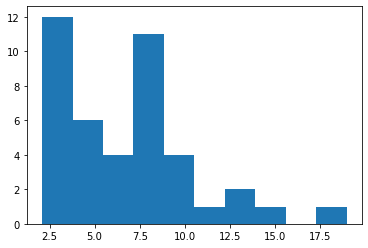

In [20]:
plt.hist(best_periods)